In [1]:
from coffea import util, processor
import matplotlib.pyplot as plt
import mplhep
import numpy as np
import pandas as pd
import coffea.processor as processor
plt.style.use(mplhep.style.CMS)

In [3]:
infile_QCD = util.load("Data_selected_raw_2017QCD.coffea")
infile_Sig = util.load("Data_selected_raw_2017Res1ToRes2GluTo3Glu.coffea")
display(infile_QCD)
display(infile_Sig)

{'total_events': defaultdict_accumulator(int,
                         {'QCD_Pt_2400to3200': 1500,
                          'QCD_Pt_800to1000': 1905945,
                          'QCD_Pt_600to800': 12799311,
                          'QCD_Pt_1000to1400': 1517307,
                          'QCD_Pt_470to600': 27791204,
                          'QCD_Pt_300to470': 109308273,
                          'QCD_Pt_1400to1800': 48500,
                          'QCD_Pt_1800to2400': 15031,
                          'QCD_Pt_3200toInf': 500}),
 'selected_events': defaultdict_accumulator(int,
                         {'QCD_Pt_2400to3200': 1157,
                          'QCD_Pt_800to1000': 1546526,
                          'QCD_Pt_600to800': 10155742,
                          'QCD_Pt_1000to1400': 1236732,
                          'QCD_Pt_470to600': 16564908,
                          'QCD_Pt_300to470': 5565471,
                          'QCD_Pt_1400to1800': 39486,
                          'QCD_P

{'total_events': defaultdict_accumulator(int,
                         {'Res1ToRes2GluTo3Glu_M1-8000_R-0p9': 49992,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p7': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p3': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p5': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p2': 49997,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p1': 47979,
                          'Res1ToRes2GluTo3Glu_M1-7000_R-0p9': 47998,
                          'Res1ToRes2GluTo3Glu_M1-7000_R-0p7': 46997,
                          'Res1ToRes2GluTo3Glu_M1-7000_R-0p5': 49999,
                          'Res1ToRes2GluTo3Glu_M1-7000_R-0p3': 49998,
                          'Res1ToRes2GluTo3Glu_M1-7000_R-0p2': 49998,
                          'Res1ToRes2GluTo3Glu_M1-6000_R-0p9': 49996,
                          'Res1ToRes2GluTo3Glu_M1-7000_R-0p1': 49972,
                          'Res1ToRes2GluTo3G

In [4]:
var2use = [var for var in infile_QCD.keys()]
var2use.pop(0)
var2use.pop(0)
display(var2use)

# Import dict_accumulator into padas
QCD_samples = [x for x in infile_QCD["total_events"].keys()]
QCD_dict = {}
QCD_df_dict_train = {}
QCD_df_dict_test = {}
Sig_samples = []
# only use signals with M > 2 TeV, note removing samples from a list is bugged, since when removing elements, it is possible for the code to
# skipped some elements
for x in infile_Sig["total_events"].keys():
    if any([n in x for n in ["-500_","-750_","-1000_"]]):
        continue
    Sig_samples.append(x)
display(Sig_samples)
Sig_dict = {}
Sig_df_dict_train = {}
Sig_df_dict_test = {}

from sklearn.model_selection import train_test_split
for sample in QCD_samples:
    print("Reading data for: ", sample)
    QCD_dict[sample] = {}
    for var in var2use:
        QCD_dict[sample][var] = infile_QCD[var][sample].value
    df_temp = pd.DataFrame(data=QCD_dict[sample])
    df_temp_set1, df_temp_set2 = train_test_split(df_temp, train_size=0.02, random_state=1)
    # We seperate dataset here manually so it is earlier to calculate the sentivity in the end (which needs us to reweight the QCD files)
    QCD_df_dict_train[sample] = df_temp_set1
    QCD_df_dict_test[sample] = df_temp_set2
        
for sample in Sig_samples:
    print("Reading data for: ", sample)
    Sig_dict[sample] = {}
    for var in var2use:
        Sig_dict[sample][var] = infile_Sig[var][sample].value
    df_temp = pd.DataFrame(data=Sig_dict[sample])
    df_temp_set1, df_temp_set2 = train_test_split(df_temp, train_size=0.25, random_state=1)
    Sig_df_dict_train[sample] = df_temp_set1
    Sig_df_dict_test[sample] = df_temp_set2

['eta_0_final',
 'ptoverM_0_final',
 'eta_1_final',
 'ptoverM_1_final',
 'eta_2_final',
 'ptoverM_2_final',
 'dEta_01_final',
 'dR_01_final',
 'moverM_01_final',
 'dEta_12_final',
 'dR_12_final',
 'moverM_12_final',
 'dEta_20_final',
 'dR_20_final',
 'moverM_20_final',
 'dR_0_12_final',
 'dEta_0_12_final',
 'Phi_0_12_final',
 'dPtoverM_0_12_final',
 'dR_1_20_final',
 'dEta_1_20_final',
 'Phi_1_20_final',
 'dPtoverM_1_20_final',
 'dR_2_01_final',
 'dEta_2_01_final',
 'Phi_2_01_final',
 'dPtoverM_2_01_final',
 'ptoverM_max_final',
 'ptoverM_min_final',
 'eta_max_final',
 'dR_max_final',
 'dR_min_final',
 'dEta_max_final',
 'dEta_min_final',
 'dR_j_jj_max_final',
 'dR_j_jj_min_final',
 'dEta_j_jj_max_final',
 'dEta_j_jj_min_final',
 'dPhi_j_jj_max_final',
 'dPhi_j_jj_min_final',
 'dPtoverM_j_jj_max_final',
 'dPtoverM_j_jj_min_final']

['Res1ToRes2GluTo3Glu_M1-8000_R-0p9',
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p7',
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p3',
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p5',
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p2',
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p1',
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p9',
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p7',
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p5',
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p3',
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p2',
 'Res1ToRes2GluTo3Glu_M1-6000_R-0p9',
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p1',
 'Res1ToRes2GluTo3Glu_M1-6000_R-0p7',
 'Res1ToRes2GluTo3Glu_M1-6000_R-0p3',
 'Res1ToRes2GluTo3Glu_M1-6000_R-0p5',
 'Res1ToRes2GluTo3Glu_M1-6000_R-0p2',
 'Res1ToRes2GluTo3Glu_M1-6000_R-0p1',
 'Res1ToRes2GluTo3Glu_M1-5000_R-0p9',
 'Res1ToRes2GluTo3Glu_M1-5000_R-0p7',
 'Res1ToRes2GluTo3Glu_M1-5000_R-0p3',
 'Res1ToRes2GluTo3Glu_M1-5000_R-0p5',
 'Res1ToRes2GluTo3Glu_M1-5000_R-0p2',
 'Res1ToRes2GluTo3Glu_M1-5000_R-0p1',
 'Res1ToRes2GluTo3Glu_M1-4000_R-0p9',
 'Res1ToRes2GluTo3Glu_M1-4000_R-0p7',
 'Res1ToRes2

Reading data for:  QCD_Pt_2400to3200
Reading data for:  QCD_Pt_800to1000
Reading data for:  QCD_Pt_600to800
Reading data for:  QCD_Pt_1000to1400
Reading data for:  QCD_Pt_470to600
Reading data for:  QCD_Pt_300to470
Reading data for:  QCD_Pt_1400to1800
Reading data for:  QCD_Pt_1800to2400
Reading data for:  QCD_Pt_3200toInf
Reading data for:  Res1ToRes2GluTo3Glu_M1-8000_R-0p9
Reading data for:  Res1ToRes2GluTo3Glu_M1-8000_R-0p7
Reading data for:  Res1ToRes2GluTo3Glu_M1-8000_R-0p3
Reading data for:  Res1ToRes2GluTo3Glu_M1-8000_R-0p5
Reading data for:  Res1ToRes2GluTo3Glu_M1-8000_R-0p2
Reading data for:  Res1ToRes2GluTo3Glu_M1-8000_R-0p1
Reading data for:  Res1ToRes2GluTo3Glu_M1-7000_R-0p9
Reading data for:  Res1ToRes2GluTo3Glu_M1-7000_R-0p7
Reading data for:  Res1ToRes2GluTo3Glu_M1-7000_R-0p5
Reading data for:  Res1ToRes2GluTo3Glu_M1-7000_R-0p3
Reading data for:  Res1ToRes2GluTo3Glu_M1-7000_R-0p2
Reading data for:  Res1ToRes2GluTo3Glu_M1-6000_R-0p9
Reading data for:  Res1ToRes2GluTo3Glu_

In [5]:
QCD_df_list = [x for x in QCD_df_dict_train.keys()]
Sig_df_list = [x for x in Sig_df_dict_train.keys()]
QCD_df_train = pd.concat([QCD_df_dict_train[x] for x in QCD_df_list])
Sig_df_train = pd.concat([Sig_df_dict_train[x] for x in Sig_df_list])
QCD_df_test = pd.concat([QCD_df_dict_test[x] for x in QCD_df_list])
Sig_df_test = pd.concat([Sig_df_dict_test[x] for x in Sig_df_list])
print(QCD_df_train.head(), Sig_df_train.head(), QCD_df_test.head(), Sig_df_test.head())

      eta_0_final  ptoverM_0_final  eta_1_final  ptoverM_1_final  eta_2_final  \
1110     0.227539         0.506617     0.172150         0.463307     1.038330   
753      0.578857         0.437256    -0.527466         0.416057     0.094986   
1001     0.725830         0.434771     0.052406         0.425891     1.918701   
580      0.429321         0.500237     0.049850         0.448204     0.047386   
562     -0.429138         0.410324     0.552124         0.391544     1.772949   

      ptoverM_2_final  dEta_01_final  dR_01_final  moverM_01_final  \
1110         0.017856       0.055389     3.137452         0.974908   
753          0.012685       1.106323     3.311256         0.987357   
1001         0.038358       0.673424     3.162766         0.910947   
580          0.032745       0.379471     3.078046         0.964688   
562          0.036120       0.981262     3.185637         0.899621   

      dEta_12_final  ...  dEta_max_final  dEta_min_final  dR_j_jj_max_final  \
1110       0.

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare lables for dataframes, please note we already spplited the data
QCD_labels = np.zeros(QCD_df_train.shape[0])
Sig_labels = np.ones(Sig_df_train.shape[0])

X_train = pd.concat([QCD_df_train, Sig_df_train])
y_train = np.append(QCD_labels, Sig_labels)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

PC1       PC2  labels
0  2.690424 -3.780543     0.0
1  1.684756 -1.739044     0.0
2  0.192061 -1.265055     0.0
3  2.793791 -3.639871     0.0
4 -0.339742 -0.529709     0.0

dEta_max_final     0.253619
dR_max_final       0.240539
ptoverM_0_final    0.233306
dtype: float64

dPtoverM_j_jj_max_final    0.310428
dPtoverM_0_12_final        0.286393
dPtoverM_1_20_final        0.275798
dtype: float64

moverM_01_final        0.346032
moverM_20_final        0.342247
dPhi_j_jj_min_final    0.266921
dtype: float64

dR_12_final        0.307262
ptoverM_1_final    0.284172
dEta_2_01_final    0.260286
dtype: float64

dR_20_final        0.310082
dR_2_01_final      0.308191
dEta_2_01_final    0.278101
dtype: float64

dPhi_j_jj_max_final    0.510175
Phi_1_20_final         0.380733
Phi_0_12_final         0.378122
dtype: float64

dR_j_jj_min_final    0.395263
dEta_20_final        0.382036
dEta_1_20_final      0.266845
dtype: float64

dEta_2_01_final        0.336850
dEta_j_jj_min_final    0.287237
dEta_min_final         0.260281
dtype: float64

eta_1_final    0.709955
eta_2_final    0.703744
eta_0_final    0.023660
dtype: float64

eta_0_final    0.949301
eta_2_final    0.238468
eta_1_final    0.204785
dtype: float64

Phi_2_01_final         0.426616
Phi_1_20_final         0.402836
dPhi_j_jj_max_final    0.400393
dtype: float64

eta_1_final    0.673669
eta_2_final    0.669154
eta_0_final    0.313378
dtype: float64

dR_j_jj_min_final    0.350720
dR_min_final         0.330582
dR_max_final         0.279059
dtype: float64

dEta_min_final         0.856439
dEta_j_jj_min_final    0.209612
dR_max_final           0.203173
dtype: float64

eta_max_final          0.567062
dR_0_12_final          0.388467
dEta_j_jj_min_final    0.324396
dtype: float64

eta_max_final          0.622772
Phi_0_12_final         0.347537
dPtoverM_2_01_final    0.245953
dtype: float64

Phi_0_12_final    0.626934
Phi_1_20_final    0.624255
eta_max_final     0.223813
dtype: float64

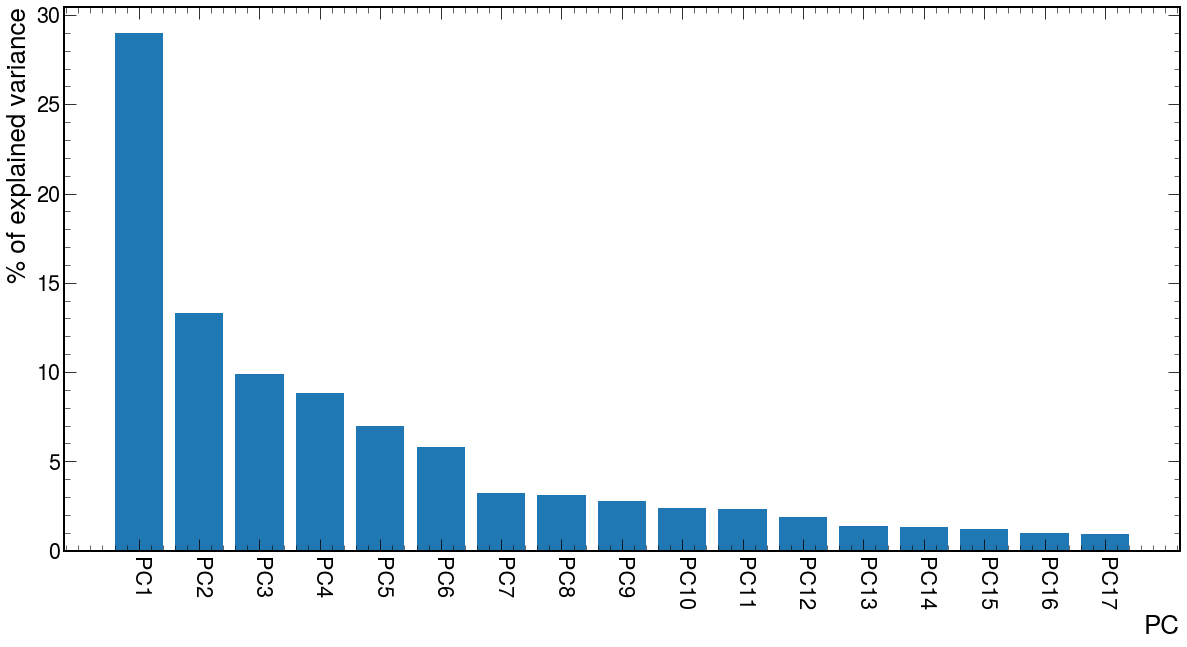

array([[ 3.63828399e-04,  2.33305773e-01,  2.66590762e-04,
         1.53007361e-01, -9.09214982e-05,  1.35119524e-01,
        -2.15958928e-01, -2.03595149e-01, -4.74813246e-03,
        -1.42230994e-01, -9.03376260e-02, -9.40560554e-03,
        -1.69826130e-01, -1.07142401e-01,  4.11916565e-02,
        -2.23352764e-01, -2.07514232e-01, -3.71194147e-02,
         1.20834772e-01, -2.18055617e-01, -2.04344368e-01,
        -3.50854063e-02,  1.19511076e-01, -1.65036077e-01,
        -1.59974013e-01, -1.64394060e-02,  1.18664079e-01,
         2.33305773e-01,  1.35119524e-01, -1.87797625e-01,
        -2.40539171e-01, -1.14963030e-01, -2.53618818e-01,
        -1.65114000e-01, -2.27459687e-01, -1.61112096e-01,
        -2.15749422e-01, -1.99143615e-01, -7.25917934e-03,
        -3.12128721e-02,  1.33112659e-01,  1.05361106e-01],
       [ 7.95864943e-04, -6.29010977e-02,  2.14576957e-04,
        -2.12264077e-01,  1.06026304e-03,  1.51201404e-01,
         4.36458213e-02, -1.21904111e-01, -2.69469089e-

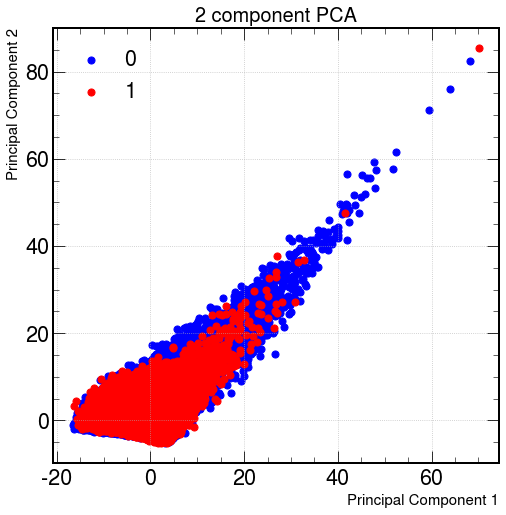

In [37]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
# scaled_df = preprocessing.scale(X_train)
scaled_df = X_train
pca = PCA(0.95)
pca.fit(scaled_df)
PCA_df = pca.transform(scaled_df)
PCA_df = pd.DataFrame(data = PCA_df[:,:2],columns = ["PC1","PC2"])
PCA_df_final = pd.concat([PCA_df,pd.DataFrame(y_train, columns=["labels"])] ,axis = 1)
display(PCA_df_final.head())
# Calculate percentage variation
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
# Calculate loading scores, determine best variables of each PCs
for i in range(0, len(per_var)):
    loading_scores = pd.Series(pca.components_[i], index=var2use)
    loading_scores = loading_scores.abs().sort_values(ascending=False)
    display(loading_scores[:3])
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(20,10))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("% of explained variance")
plt.xlabel("PC")
plt.xticks(rotation=270)
plt.show()
display(pca.components_)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ["b","r"]
for target, color in zip(targets,colors):
    indicesToKeep = PCA_df_final["labels"] == target
    ax.scatter(PCA_df_final.loc[indicesToKeep, "PC1"],
               PCA_df_final.loc[indicesToKeep, "PC2"],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

array([[ 1.00000000e+00, -8.51127514e-06, -4.63445410e-02, ...,
        -1.18856165e-03,  1.72489378e-03,  6.89863037e-05],
       [-8.51127514e-06,  1.00000000e+00,  1.58002379e-04, ...,
        -2.68796262e-02,  3.77617072e-01,  4.67604968e-01],
       [-4.63445410e-02,  1.58002379e-04,  1.00000000e+00, ...,
         6.35823303e-04,  9.09354389e-04, -1.58354447e-04],
       ...,
       [-1.18856165e-03, -2.68796262e-02,  6.35823303e-04, ...,
         1.00000000e+00, -3.64489792e-01, -1.54668469e-01],
       [ 1.72489378e-03,  3.77617072e-01,  9.09354389e-04, ...,
        -3.64489792e-01,  1.00000000e+00,  8.08459348e-01],
       [ 6.89863037e-05,  4.67604968e-01, -1.58354447e-04, ...,
        -1.54668469e-01,  8.08459348e-01,  1.00000000e+00]])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5]),
 [Text(0.5, 0, 'eta_0_final'),
  Text(1.5, 0, 'ptoverM_0_final'),
  Text(2.5, 0, 'eta_1_final'),
  Text(3.5, 0, 'ptoverM_1_final'),
  Text(4.5, 0, 'eta_2_final'),
  Text(5.5, 0, 'ptoverM_2_final'),
  Text(6.5, 0, 'dEta_01_final'),
  Text(7.5, 0, 'dR_01_final'),
  Text(8.5, 0, 'moverM_01_final'),
  Text(9.5, 0, 'dEta_12_final'),
  Text(10.5, 0, 'dR_12_final'),
  Text(11.5, 0, 'moverM_12_final'),
  Text(12.5, 0, 'dEta_20_final'),
  Text(13.5, 0, 'dR_20_final'),
  Text(14.5, 0, 'moverM_20_final'),
  Text(15.5, 0, 'dR_0_12_final'),
  Text(16.5, 0, 'dEta_0_12_final'),
  Text(17.5, 0, 'Phi_0_12_final'),
  Text(18.5, 0, 'dPtoverM_0_12_final'),
  Text(19.5, 0, 'dR_1_20_final'),
  Text(20.5, 0, 'dEta_1_20_final'),

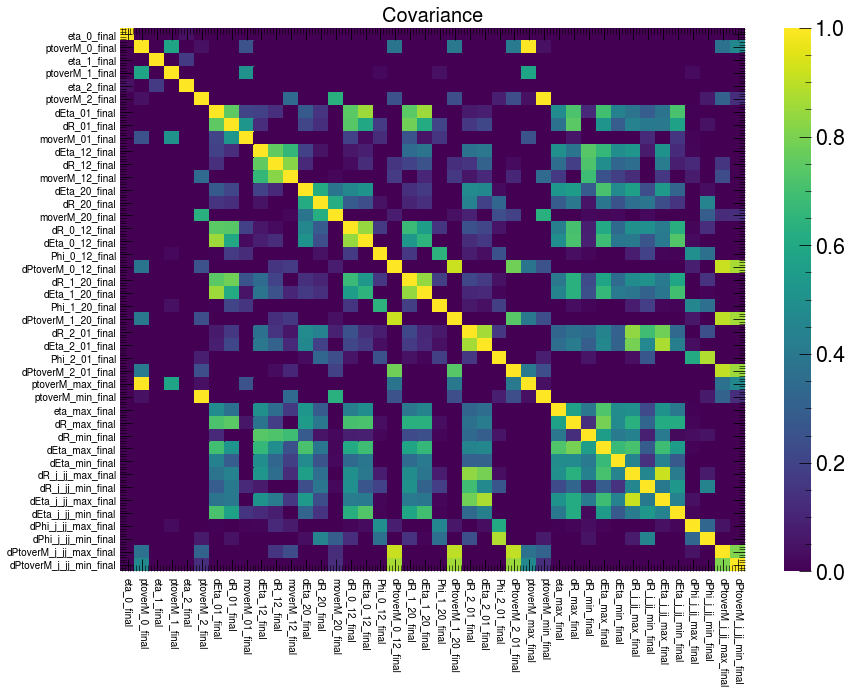

In [33]:
from sklearn.covariance import EmpiricalCovariance
import seaborn as sns
empcov = EmpiricalCovariance(assume_centered=True)
cov = empcov.fit(X_train)
display(cov.covariance_)
var_names = QCD_df_train.columns

fig, ax = plt.subplots(figsize = (14,10))
sns.heatmap(cov.covariance_, ax=ax, vmin=0, vmax=1, xticklabels=var_names, yticklabels=var_names, cmap="viridis")
ax.axes.set_title("Covariance",fontsize=20)
ax.tick_params(labelsize=10)
plt.xticks(rotation=270)

In [9]:
clf = MLPClassifier(solver='adam',hidden_layer_sizes=(20,20),random_state=1)
clf.fit(X_train, y_train)
print("Number of QCD events used for training (first split): ", QCD_df_train.shape[0])
print("Number of Sig events used for training (first split): ", Sig_df_train.shape[0])

Number of QCD events used for training (first split):  702444
Number of Sig events used for training (first split):  501344


NameError: name 'QCD_set1' is not defined

In [ ]:
# Manually calculate classificiation efficiency
sig_index_list = np.where(y_test == 0)[0].tolist()
N_test = len(sig_index_list)
clf_results_sig = np.array([])
N_correct = 0
N_tested = 0
for i, index in enumerate(sig_index_list):
    if i % 20000 == 0:
        print(f"Reading: {i} out of {N_test}")
    is_correct = (y_test[index] == clf.predict(X_test[index:index+1, :])[0]) 
    if is_correct:
        clf_results_sig = np.append(clf_results_sig, 1)
    else:
        clf_results_sig = np.append(clf_results_sig, 0)
    # save results and restart again to speed things up
    if i % 20000 == 0:
        N_correct += np.sum(clf_results_sig)
        N_tested += np.size(clf_results_sig)
        print(N_correct, N_tested)
        clf_results_sig = np.array([])
# Save the results from last batch
N_correct += np.sum(clf_results_sig)
N_tested += np.size(clf_results_sig)
# Calculate classification efficiency
print(N_correct, N_tested, N_correct / N_tested)

In [10]:
# Score the fit using the pure QCD or Signal data
QCD_labels = np.zeros(QCD_df_test.shape[0])
Sig_labels = np.ones(Sig_df_test.shape[0])
QCD_test_scaled = scaler.transform(QCD_df_test)
print(clf.score(QCD_test_scaled,QCD_labels))
Sig_test_scaled = scaler.transform(Sig_df_test)
print(clf.score(Sig_test_scaled,Sig_labels))

0.7604113971969529
0.6560491514121191


In [11]:
# Implement weight of MCs
lumi = 41.53*1000
weight_xsec = {
    'QCD_Pt_300to470': lumi*6830/infile_QCD["total_events"]["QCD_Pt_300to470"],
    'QCD_Pt_470to600': lumi*552.1/infile_QCD["total_events"]["QCD_Pt_470to600"],
    'QCD_Pt_600to800': lumi*156.5/infile_QCD["total_events"]["QCD_Pt_600to800"],
    'QCD_Pt_800to1000': lumi*26.28/infile_QCD["total_events"]["QCD_Pt_800to1000"],
    'QCD_Pt_1000to1400': lumi*7.47/infile_QCD["total_events"]["QCD_Pt_1000to1400"],
    'QCD_Pt_1400to1800': lumi*0.6484/infile_QCD["total_events"]["QCD_Pt_1400to1800"],
    'QCD_Pt_1800to2400': lumi*0.08743/infile_QCD["total_events"]["QCD_Pt_1800to2400"],
    'QCD_Pt_2400to3200': lumi*0.005236/infile_QCD["total_events"]["QCD_Pt_2400to3200"],
    'QCD_Pt_3200toInf': lumi*0.0001357/infile_QCD["total_events"]["QCD_Pt_3200toInf"],
}
weight_sig = {}
for name, N_evt in infile_Sig["total_events"].items():
    weight_sig[name] = lumi/N_evt
weight_xsec.update(weight_sig)
display(weight_xsec)

# Get the total number of events being selected by HLT and pre-selection
N_QCD = 0
for sample, N_selected in infile_QCD["selected_events"].items():
    N_QCD += N_selected
N_Sig = 0
for sample, N_selected in infile_Sig["selected_events"].items():
    N_Sig += N_selected
    
# Calculate corrections need to be applied into S/sqrt(B), since we only use half of the data for calculation
ratio_bkg = QCD_df_test.shape[0] / N_QCD
ratio_sig = Sig_df_test.shape[0] / N_Sig
print(ratio_bkg, ratio_sig)

{'QCD_Pt_300to470': 2.5949536317347177,
 'QCD_Pt_470to600': 0.8250348923349993,
 'QCD_Pt_600to800': 0.5077964743570963,
 'QCD_Pt_800to1000': 0.5726337328726695,
 'QCD_Pt_1000to1400': 0.20446033663589502,
 'QCD_Pt_1400to1800': 0.5552175670103092,
 'QCD_Pt_1800to2400': 0.24156529173042376,
 'QCD_Pt_2400to3200': 0.14496738666666667,
 'QCD_Pt_3200toInf': 0.011271241999999999,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p9': 0.8307329172667627,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p7': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p3': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p5': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p2': 0.8306498389903394,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p1': 0.8655870276579337,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p9': 0.865244385182716,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p7': 0.8836734259633594,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p5': 0.8306166123322466,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p3': 0.8306332253290132,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p2': 0.8306332253290132,
 'Res1ToRes2GluTo3Glu_M1

0.9800001229983724 0.7398878819868382


In [12]:
import math
N_bkg_tagged = 0
for sample in QCD_df_dict_test.keys():
    weight = weight_xsec[sample]
    bkg_scaled = scaler.transform(QCD_df_dict_test[sample])
    bkg_result = clf.predict(bkg_scaled)
    N_bkg_tagged += np.sum(bkg_result) * (weight / ratio_bkg)
print(N_bkg_tagged)

N_sig_tagged = 0
for sample in ["Res1ToRes2GluTo3Glu_M1-2000_R-0p3"]:
    weight = weight_xsec[sample]
    sig_scaled = scaler.transform(Sig_df_dict_test[sample])
    sig_result = clf.predict(sig_scaled)
    N_sig_tagged += np.sum(sig_result) * (weight / ratio_sig)
print(N_sig_tagged)
print(N_sig_tagged/math.sqrt(N_bkg_tagged))

9236279.74460421
18675.607239587524
6.14506092109775


In [ ]:
import joblib

filename = './MLP_QCD_ggg_15_15.pkl'
joblib.dump(clf, filename, compress=9)

clf2 = joblib.load(filename)
clf2.score(Sig_set2_scaled, Sig_label_set2)